### Feature Selection Techniques



In [1]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv")

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 1)Univariate Selection:

In [3]:
X = df.iloc[:,:-1]
Y = df['price_range']

In Univariate Selection method , we will be using Kbest method and chi2 method to find the values/score of k

A chi-square statistic is one way to show a relationship between two categorical variables.


In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
df.shape

(2000, 21)

In [10]:
## Apply selectKbest Algorithm

ordered_rank_features=SelectKBest(score_func=chi2,k=20) ##Object for selectkbest
ordered_features=ordered_rank_features.fit(X,Y)

In [11]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
ordered_features

SelectKBest(k=20, score_func=<function chi2 at 0x0000019462910670>)

In [13]:
dir(ordered_features)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_check_params',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'fit',
 'fit_transform',
 'get_params',
 'get_support',
 'inverse_transform',
 'k',
 'n_features_in_',
 'pvalues_',
 'score_func',
 'scores_',
 'set_params',
 'transform']

In [14]:
ordered_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [16]:
data=pd.DataFrame(ordered_features.scores_)

In [17]:
data.head()

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166


In [18]:
data.columns=["Scores"]

In [20]:
data

,Scores
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [29]:
d=pd.DataFrame(X.columns)

In [30]:
pd.concat([data,d])

,Scores,0
0,14129.866576,NaN
1,0.723232,NaN
2,0.648366,NaN
3,0.631011,NaN
4,10.135166,NaN
5,1.521572,NaN
6,89.839124,NaN
7,0.745820,NaN
8,95.972863,NaN
9,9.097556,NaN


In [31]:
pd.concat([d,data],axis=1)

,0,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [39]:
d1=pd.concat([d,data],axis=1)
d1.sort_values(by=['Scores'],inplace=True)

In [42]:
d1

,0,Scores
17,three_g,0.327643
19,wifi,0.422091
3,dual_sim,0.631011
2,clock_speed,0.648366
1,blue,0.723232
7,m_dep,0.745820
5,four_g,1.521572
18,touch_screen,1.928429
9,n_cores,9.097556
10,pc,9.186054


In [43]:
d1.columns=["Features","Scores"]

In [44]:
## Another method to sort :

d1.nlargest(10,'Scores')  ## These all are important features.

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### Higher the score , greater the importance of features wrt to target(Y)
#### So we can drop the features with less scores as it won't affect our model much 

In [48]:
d1.sort_values(by=['Scores'],inplace=True,ascending=True)

In [55]:
c=d1['Features'].head(5)

In [56]:
c


17        three_g
19           wifi
3        dual_sim
2     clock_speed
1            blue
Name: Features, dtype: object

In [57]:
type(c)

pandas.core.series.Series

In [58]:
X.drop(c,axis=1)

,battery_power,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
0,842,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0
4,1821,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1
1996,1965,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1
1997,1911,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1
1998,1512,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1


In [59]:
## At first there were 21 columns and now we dropped 5 so there are 15 columns in total

In [ ]:
## This is how we perform feature selection using Univariate Method(SelectKbest and chi2)

In [60]:
##----------------------------

# 2) Feature Importance

This technique gives you a score for each feature of your data, the higher the score, more the relevant it is

In [ ]:
## We will be using ensemble technique (ExtraTreesClassifier) to find scores for each features

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model= ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [62]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_

In [63]:
model.score

<bound method ClassifierMixin.score of ExtraTreesClassifier()>

In [64]:
model.feature_importances_

array([0.06125511, 0.02009075, 0.03325125, 0.01874137, 0.03145095,
       0.01696348, 0.03525472, 0.03224609, 0.03553989, 0.03372912,
       0.03241915, 0.04849803, 0.04915594, 0.39782482, 0.03380466,
       0.03379853, 0.03437491, 0.01442949, 0.01737208, 0.01979966])

In [65]:
ranked_features=pd.DataFrame(model.feature_importances_,index=X.columns)

In [66]:
ranked_features.head()

,0
battery_power,0.061255
blue,0.020091
clock_speed,0.033251
dual_sim,0.018741
fc,0.031451


In [68]:
ranked_features.columns=["Scores"]

In [70]:
ranked_features.nlargest(10,'Scores')

,Scores
ram,0.397825
battery_power,0.061255
px_width,0.049156
px_height,0.048498
mobile_wt,0.035540
int_memory,0.035255
talk_time,0.034375
sc_h,0.033805
sc_w,0.033799
n_cores,0.033729


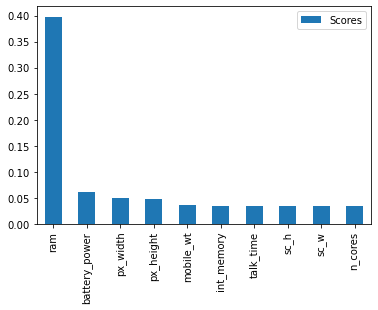

In [71]:
ranked_features.nlargest(10,'Scores').plot(kind='bar')

In [72]:
## If you compare this method with Univariate, we can see the top 10 are almost similar ; only 1-2 changes are there.

#### In this way , we can perform feature selection using Feature importance method(ExtraTreesClassifier) by dropping all the features with low importance

In [73]:
##----------------------------------------

# 3)Correlation:

In [74]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [77]:
import seaborn as sns
cor=df.corr()

In [78]:
cor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [80]:
topfeatures=cor.index

In [81]:
sns.heatmap(topfeatures,annot=True)

IndexError: Inconsistent shape between the condition and the input (got (21, 1) and (21,))

In [82]:
sns.heatmap(topfeatures.corr(),annot=True)

AttributeError: 'Index' object has no attribute 'corr'

<Figure size 1440x1440 with 0 Axes>

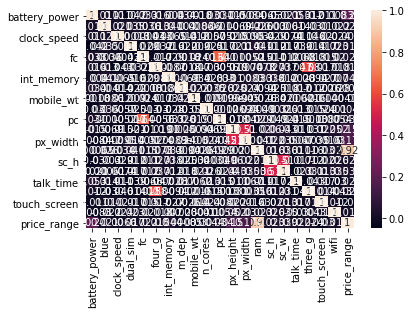

<Figure size 1440x1440 with 0 Axes>

In [84]:
sns.heatmap(df[topfeatures].corr(),annot=True)
plt.figure(figsize=(20,20))

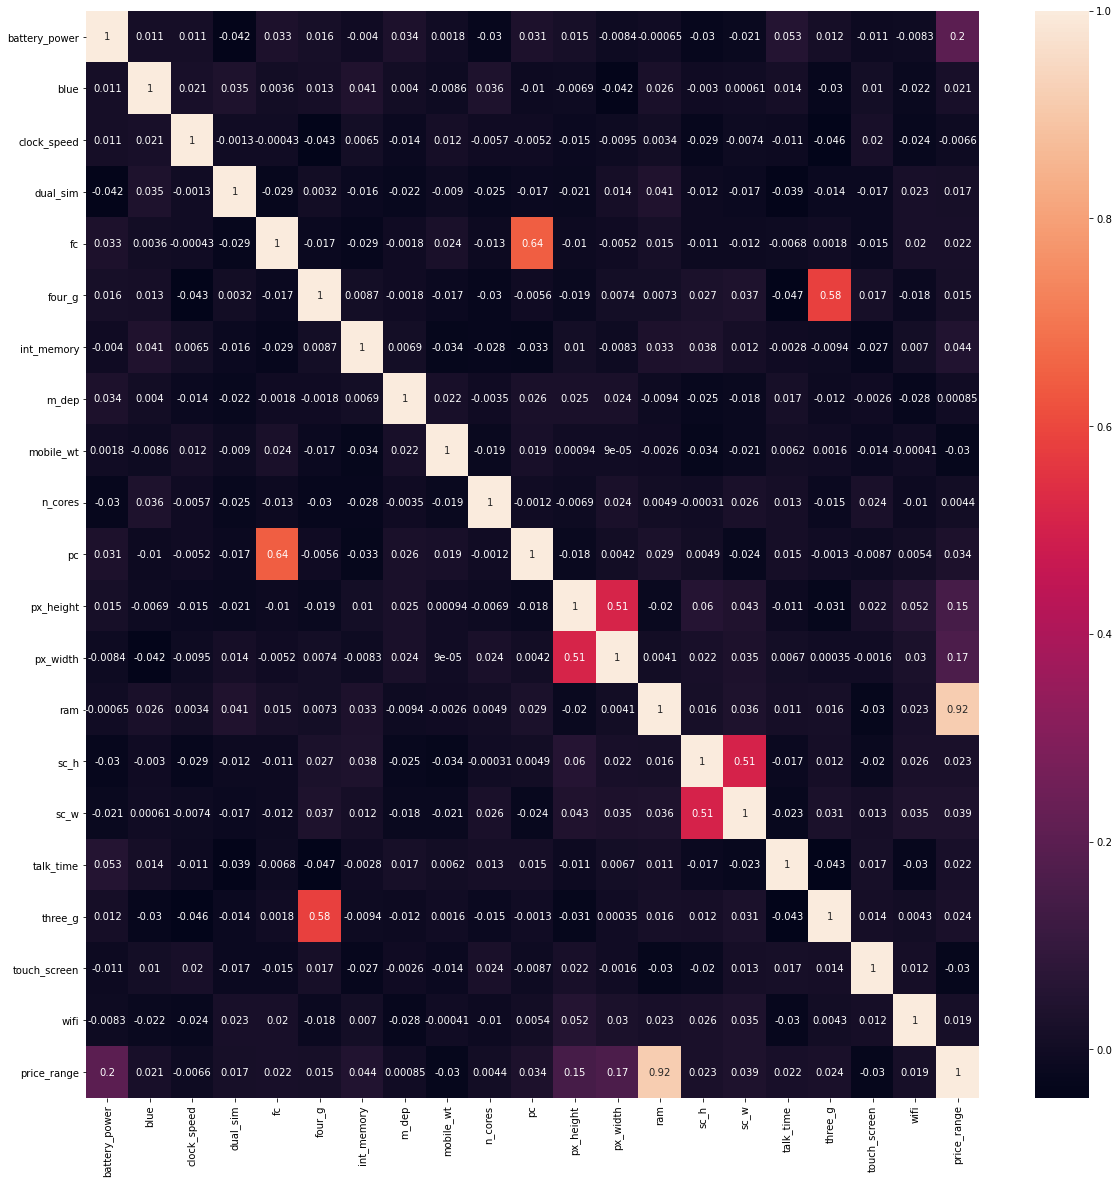

In [87]:
plt.figure(figsize=(20,20))
sns.heatmap(df[topfeatures].corr(),annot=True)

In [88]:
## Now we will drop the features which are highly correlated (i.e: features above threshold value)

#### But while doing this , we can't consider the dependent feature as we are just finding correlation between independent variable and ofcourse we can't drop DEPENDENT feature

In [90]:
plt.figure(figsize=(20,20))
sns.heatmap(df[:,:-1].corr(),annot=True)

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

<Figure size 1440x1440 with 0 Axes>

In [91]:
##'(slice(None, None, None), slice(None, -1, None))' is an invalid key
## We forgot Slicing( iloc )

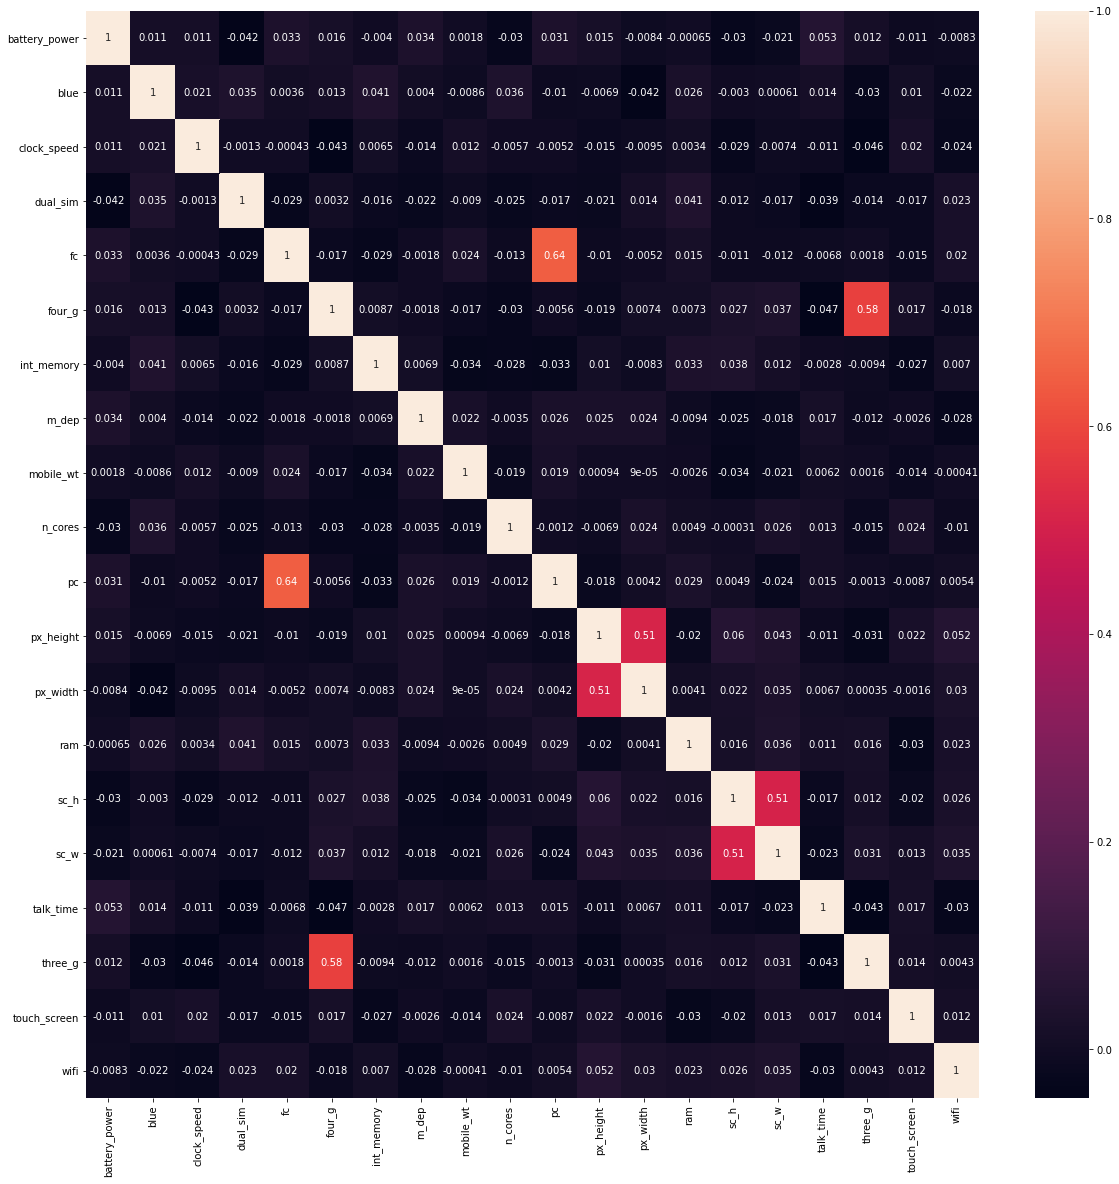

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True)

In [93]:
## Now we will remove highly correlated INDEPENDENT features

In [94]:
def cor(dataset,threshold):
    col_cor=set()
    corr_arr=dataset.iloc[:,:-1].corr()
    for i in range(len(corr_arr)):
        for j in range(i):
            if abs(corr_arr.iloc[i,j])>threshold:   ## Though we use 'abs' but mostly we are interested only in postively correlated values
                col_name=dataset.columns[i]
                col_cor.add(col_name)
                
    return col_cor

In [ ]:
## NOTE: Actually this feature selection operations are done on X_train but here we are just seeing and learning how's it done basically

In [95]:
threshold = 0.5 ## this threshold value can be set by asking domain expert

In [102]:
K=cor(df,threshold)

In [104]:
K

{'pc', 'px_width', 'sc_w', 'three_g'}

In [101]:
df.drop(K,axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,ram,sc_h,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,2549,9,19,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,2631,17,7,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,2603,11,9,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,1216,2769,16,11,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,1208,1411,8,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,1222,668,13,19,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,915,2032,11,16,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,868,3057,9,5,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,336,869,18,19,1,1,0


#### We dropped 4 columns as they were highly correlated and this is how we perform feature selection using concept of PEARSON CORRELATION

In [ ]:
##------------------------

## Information Gain

It is another method used for feature selection.

It uses mutual_info_classi library to calculate the importance of features  

In [2]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv")

In [3]:
X = df.iloc[:,:-1]
Y = df['price_range']

In [1]:
from sklearn.feature_selection import mutual_info_classif

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


 Mutual information (MI) [1]_ between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [4]:
mutual_info_classif(X,Y)   ##Estimate mutual information for a discrete target variable.

array([0.02548176, 0.        , 0.        , 0.        , 0.        ,
       0.00839712, 0.00255854, 0.03457057, 0.0242464 , 0.        ,
       0.03790584, 0.02757459, 0.03321125, 0.84813312, 0.        ,
       0.00541993, 0.0095984 , 0.00808677, 0.        , 0.01453909])

In [ ]:
## It uses 'Information Gain' to calculate the score

In [5]:
m=mutual_info_classif(X,Y)

In [6]:
df=pd.Series(m,index=X.columns)

In [9]:
df.sort_values(ascending=False)

ram              0.849881
px_width         0.030199
battery_power    0.028233
dual_sim         0.027431
px_height        0.024167
three_g          0.020420
mobile_wt        0.011491
int_memory       0.006739
sc_w             0.005503
four_g           0.001953
blue             0.000000
clock_speed      0.000000
fc               0.000000
wifi             0.000000
m_dep            0.000000
touch_screen     0.000000
pc               0.000000
sc_h             0.000000
talk_time        0.000000
n_cores          0.000000
dtype: float64

In [10]:
## Now as we know, 0 indicates no relation between feature and target variable and therefore we can drop them

In [15]:
df=df.iloc[:-11]

In [24]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [17]:
X.drop(df,axis=1)

KeyError: '[0.02823348057442887 0.0 0.0 0.027430655457194142 0.0 0.001952590084209227\n 0.006738556177059429 0.0 0.011491490177354624] not found in axis'

In [21]:
c=df.index

In [22]:
c

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt'],
      dtype='object')

In [23]:
X.drop(c,axis=1)

,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,2,2,20,756,2549,9,7,19,0,0,1
1,3,6,905,1988,2631,17,3,7,1,1,0
2,5,6,1263,1716,2603,11,2,9,1,1,0
3,6,9,1216,1786,2769,16,8,11,1,0,0
4,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,6,14,1222,1890,668,13,4,19,1,1,0
1996,4,3,915,1965,2032,11,10,16,1,1,1
1997,8,3,868,1632,3057,9,1,5,1,1,0
1998,5,5,336,670,869,18,10,19,1,1,1


In [24]:
## This is how we perform feature selection using Information gain method